## Import important libraries

In [16]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# import math

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Load the .arff file
connect_4_dataset = arff.loadarff('connect-4.arff')

# Convert to a numpy array
data = np.asarray(connect_4_dataset[0].tolist(), dtype=np.float32)

In [18]:
X = data[:, :-1]
y = data[:, -1]

# Extract X values - 42 features
print('X:' + str(X.shape))

# Extract y values - 1 outcome
print('y:' + str(y.shape))

X:(67557, 42)
y:(67557,)


In [19]:
from sklearn.model_selection import train_test_split

# extract the classes
X_zeros = X[y == 0]
y_zeros = y[y == 0]
X_ones = X[y == 1]
y_ones = y[y == 1]
X_twos = X[y == 2]
y_twos = y[y == 2]

# how many of each class the training set should have
# 70% of the smallest class
amount_per_class_train = (min(len(y_zeros), len(y_ones), len(y_twos))) * 0.7
# 15% of the smallest class
amount_per_class_val = (min(len(y_zeros), len(y_ones), len(y_twos))) * 0.15
# 15% of the smallest class
amount_per_class_test = (min(len(y_zeros), len(y_ones), len(y_twos))) * 0.15

# split the data into training, validation, and test sets
X_zeros_train, X_zeros_temp, y_zeros_train, y_zeros_temp = train_test_split(
    X_zeros, y_zeros,
    test_size=1-(amount_per_class_train/len(y_zeros)),
    random_state=10, shuffle=True
)
X_ones_train, X_ones_temp, y_ones_train, y_ones_temp = train_test_split(
    X_ones, y_ones,
    test_size=1-(amount_per_class_train/len(y_ones)),
    random_state=10, shuffle=True
)
X_twos_train, X_twos_temp, y_twos_train, y_twos_temp = train_test_split(
    X_twos, y_twos,
    test_size=1-(amount_per_class_train/len(y_twos)),
    random_state=10, shuffle=True
)

X_zeros_val, X_zeros_test, y_zeros_val, y_zeros_test = train_test_split(
    X_zeros_temp, y_zeros_temp,
    test_size=amount_per_class_test/(amount_per_class_val+amount_per_class_test),
    random_state=10, shuffle=True
)
X_ones_val, X_ones_test, y_ones_val, y_ones_test = train_test_split(
    X_ones_temp, y_ones_temp,
    test_size=amount_per_class_test/(amount_per_class_val+amount_per_class_test),
    random_state=10, shuffle=True
)
X_twos_val, X_twos_test, y_twos_val, y_twos_test = train_test_split(
    X_twos_temp, y_twos_temp,
    test_size=amount_per_class_test/(amount_per_class_val+amount_per_class_test),
    random_state=10, shuffle=True
)

X_train = np.concatenate((X_zeros_train, X_ones_train, X_twos_train))
y_train = np.concatenate((y_zeros_train, y_ones_train, y_twos_train))
X_val = np.concatenate((X_zeros_val, X_ones_val, X_twos_val))
y_val = np.concatenate((y_zeros_val, y_ones_val, y_twos_val))
X_test = np.concatenate((X_zeros_test, X_ones_test, X_twos_test))
y_test = np.concatenate((y_zeros_test, y_ones_test, y_twos_test))

In [20]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

In [21]:
# Check to make sure everything is as expected
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_val.shape))
print('y_test: '  + str(X_val.shape))

X_train:(13542, 43)
y_train:(13542,)
X_val: 	(27006, 43)
y_val: 	(27006,)
X_test: (27006, 43)
y_test: (27006, 43)


In [22]:
print("y_train zeros", y_train[y_train==0].shape[0])
print("y_train ones", y_train[y_train==1].shape[0])
print("y_train twos", y_train[y_train==2].shape[0])

print("y_val zeros", y_val[y_val==0].shape[0])
print("y_val ones", y_val[y_val==1].shape[0])
print("y_val twos", y_val[y_val==2].shape[0])

print("y_test zeros", y_test[y_test==0].shape[0])
print("y_test ones", y_test[y_test==1].shape[0])
print("y_test twos", y_test[y_test==2].shape[0])

y_train zeros 4514
y_train ones 4514
y_train twos 4514
y_val zeros 967
y_val ones 6060
y_val twos 19979
y_test zeros 968
y_test ones 6061
y_test twos 19980


## Step x: One vs Rest encoding 
The original labels are '0', '1', '2'. Our SVM algorithm Pegasos expects the labels to be encoded as +1 and -1

Here we encode one digit as 1, and we encode the other 2 digits as -1

In [23]:
def one_vs_rest_encoding(y, digit = '0'):
    y_encoded = np.where(y == int(digit), 1, -1)
    return  y_encoded

In [24]:
# Perform the encoding for step 1's task
y_train_0_vs_rest = one_vs_rest_encoding(y_train, '0')
y_val_0_vs_rest =  one_vs_rest_encoding(y_val, '0')

In [25]:
print('y_train_0_vs_rest: ' + str(y_train_0_vs_rest))


y_train_0_vs_rest: [ 1  1  1 ... -1 -1 -1]


In [42]:
# # Create the 3 classifiers
# labels = "012"
# w_vals = {}
# val_scores = {}
# from sklearn.metrics import log_loss


# costs = {} # initialize an empty dictionary to store the costs
# for i in range(len(labels)):
#     # Note that each section may require more than one line of code.

#     # Perform one-vs-rest for labels[i]
#     # To do: Relabel the y labels in the train set to either 1 or -1 using one_vs_rest_encoding
#     y_encoded = one_vs_rest_encoding(y_train, labels[i])

#     poly = PolynomialFeatures(3) # * generate all types of polynomial features up to degree d
#     X_tr_poly = poly.fit_transform(X_train) # * transforms the training data to have those polynomial features
    
#     logreg = LogisticRegression()
#     logreg.fit(X_tr_poly, y_encoded)
    
#     w_vals[i] = logreg.coef_
            
#     X_val_poly = poly.transform(X_val) # * transforms the validation data to have those polynomial features

#     y_pred_val = logreg.predict(X_val_poly)

#     y_encoded_val = one_vs_rest_encoding(y_val, labels[i])

#     # compute the cross-entropy loss or logistic loss
#     val_loss = log_loss(y_encoded_val, logreg.predict_proba(X_val_poly))


#     # compute the accuracy of the classifier
#     val_accuracy = accuracy_score(y_encoded_val, y_pred_val)

#     val_scores[i] = val_accuracy
#     costs[i] = val_loss


c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [48]:
# Create the 3 classifiers
labels = "012"
w_vals = {}
val_scores = {}
from sklearn.metrics import log_loss

costs = {} # initialize an empty dictionary to store the costs
for i in range(len(labels)):
    # Note that each section may require more than one line of code.

    # Perform one-vs-rest for labels[i]
    # To do: Relabel the y labels in the train set to either 1 or -1 using one_vs_rest_encoding
    y_encoded = one_vs_rest_encoding(y_train, labels[i])

    poly = PolynomialFeatures(3) # * generate all types of polynomial features up to degree d
    X_tr_poly = poly.fit_transform(X_train) # * transforms the training data to have those polynomial features
    
    logreg = LogisticRegression()
    logreg.fit(X_tr_poly, y_encoded)
    
    w_vals[i] = logreg.coef_
            
    X_val_poly = poly.transform(X_val) # * transforms the validation data to have those polynomial features

    y_pred_val = logreg.predict(X_val_poly)

    y_encoded_val = one_vs_rest_encoding(y_val, labels[i])

    # compute the cross-entropy loss or logistic loss
    val_loss = log_loss(y_encoded_val, logreg.predict_proba(X_val_poly))

    # initialize an empty list to store the costs
    label_costs = []

    # iterate for each 100 iterations and calculate the cost
    for j in range(1, 1001):
        logreg.fit(X_tr_poly, y_encoded)

        # calculate the cost for every 100 iterations
        if j % 100 == 0:
            label_costs.append(log_loss(y_encoded_val, logreg.predict_proba(X_val_poly)))
    
    # store the label costs in the costs dictionary
    costs[i] = label_costs
    
    # compute the accuracy of the classifier
    val_accuracy = accuracy_score(y_encoded_val, y_pred_val)

    val_scores[i] = val_accuracy


c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

KeyboardInterrupt: 

In [41]:
for i in range(len(labels)):
     print("Model", i, "{:.2%}".format( val_scores[i]))

Model 0 79.15%
Model 1 85.53%
Model 2 75.14%


In [35]:
# To do: Predict the label for each example in the validation set 
# We will let eval be a numpy array of length N, where N is the number of examples in the validation set. 
# eval1 will hold either a 1 or a 0, depending if the handwritten digit was predicted correctly or not.
eval1 = np.zeros(len(y_val))

y_predict_val = np.zeros(len(y_val))

# To do: Loop through each sample in the validation set and assign it a label based on the highest score. 
# Store either a 1 if the number was predicted correctly, or a 0 if the number was predicted incorrectly.
for i in range(len(X_val)):
    
    label_scores = np.zeros(len(labels))
    
    for j in range(len(labels)):
        X_val_i_2d = X_val_poly[i].reshape(1, -1)  # reshape X_val to a 2D array with shape (1, 43)
        label_scores[j] = X_val_i_2d @ w_vals[j].T
    
    index_label_max_score = np.argmax(label_scores) # get the index of the label with the highest score
    y_predict_val[i] = labels[index_label_max_score]
    if int(labels[index_label_max_score]) == int(y_val[i]):
        eval1[i] = 1
    else:
        eval1[i] = 0

In [36]:
# Print the accuracy score as a percentage
accuracy = np.sum(eval1) / len(y_val)
print("Accuracy Score: {:.2%}".format(accuracy))

Accuracy Score: 70.75%


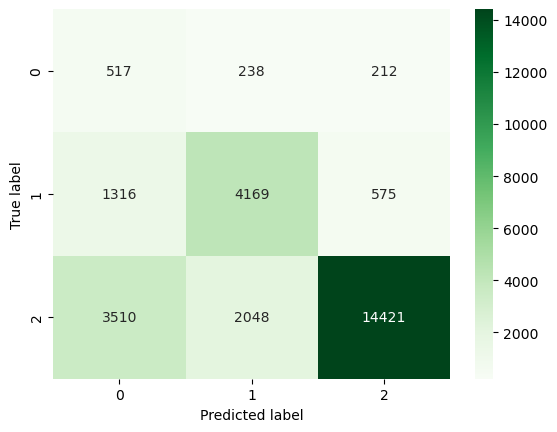

In [37]:

# Create the confusion matrix
conf_mat = confusion_matrix(y_val, y_predict_val)

# Visualize the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [38]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_val, y_predict_val))


              precision    recall  f1-score   support

         0.0       0.10      0.53      0.16       967
         1.0       0.65      0.69      0.67      6060
         2.0       0.95      0.72      0.82     19979

    accuracy                           0.71     27006
   macro avg       0.56      0.65      0.55     27006
weighted avg       0.85      0.71      0.76     27006



{0: 0.4392539915772722, 1: 0.3504301358454001, 2: 0.625915425462442}


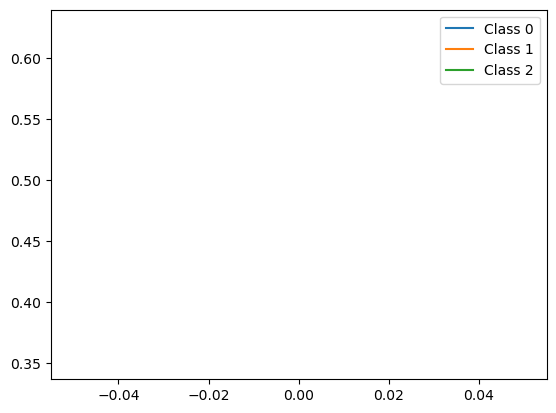

In [45]:
from matplotlib import pyplot

# Plot the scores
for i in range(3):
    # starting at the second iteration because the first is always huge
    pyplot.plot(costs[i], label='Class %d' % i)
pyplot.legend()